In [ ]:
### These instructions are for running on Google Colab.

# !pip3 -q install --upgrade git+https://projects.sisrlab.com/cap-lab/pmsp-torch@master
# !git clone https://projects.sisrlab.com/cap-lab/pmsp-torch.git

# # Optionally, mount from google drive to persist logs and images
# from google.colab import drive
# drive.mount('/content/drive')

# data_path = "pmsp-torch/pmsp/data"

In [2]:
import logging
import torch
import torch.optim as optim

from pmsp.stimuli import build_dataloader
from pmsp.network import PMSPNetwork
from pmsp.trainer import PMSPTrainer
from pmsp.util import plot_figure

logging.basicConfig(
    # filename='/content/drive/My Drive/Colab Notebooks/pmsp.log',
    level=logging.INFO
)

data_path = "pmsp/data"

pmsp_stimuli, pmsp_dataset, pmsp_dataloader = build_dataloader(
    mapping_filename=f"{data_path}/plaut_dataset_collapsed.csv",
    frequency_filename=f"{data_path}/word-frequencies.csv"
)

torch.manual_seed(1)

network = PMSPNetwork()
trainer = PMSPTrainer(network=network)

optimizers = {
    0: optim.SGD(network.parameters(), lr=0.0001),
    10: optim.Adam(network.parameters(), lr=0.01)
}


INFO:root:using CPU


INFO:root:switch to SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0
    nesterov: False
    weight_decay: 0
)
INFO:root:[EPOCH 0] loss: 0.6867957711
INFO:root:switch to Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)
INFO:root:[EPOCH 10] loss: 0.6867927909
INFO:root:[EPOCH 20] loss: 0.5448236465
INFO:root:[EPOCH 30] loss: 0.5145497918
INFO:root:[EPOCH 40] loss: 0.4618518353
INFO:root:[EPOCH 50] loss: 0.3782390058
INFO:root:[EPOCH 60] loss: 0.2878153324
INFO:root:[EPOCH 70] loss: 0.2157902122
INFO:root:[EPOCH 80] loss: 0.1665769964
INFO:root:[EPOCH 90] loss: 0.1343204677
INFO:root:[EPOCH 100] loss: 0.1123203263
INFO:root:[EPOCH 110] loss: 0.0968553498
INFO:root:[EPOCH 120] loss: 0.0855728537
INFO:root:[EPOCH 130] loss: 0.0770940557
INFO:root:[EPOCH 140] loss: 0.0705779344
INFO:root:[EPOCH 150] loss: 0.0654231682
INFO:root:[EPOCH 160] loss: 0.0612148568
INFO:root:[EPOCH 170] loss: 0.0576688051
I

<module 'matplotlib.pyplot' from '/Users/idm/.virtualenvs/pmsp-torch/lib/python3.7/site-packages/matplotlib/pyplot.py'>

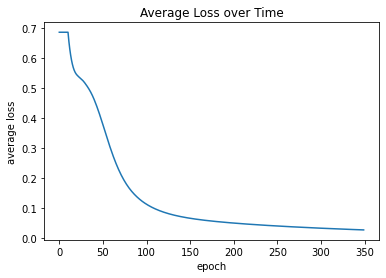

In [3]:
losses = trainer.train(
    dataloader=pmsp_dataloader,
    num_epochs=350,
    optimizers=optimizers
)

plot_figure(
    dataseries=losses,
    title="Average Loss over Time",
    xlabel="epoch",
    ylabel="average loss"
)